In [2]:
# imports
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from scipy.stats import chisquare
import seaborn as sns
import statsmodels.api as sm
import matplotlib.ticker as mtick

pio.renderers.default = 'browser'  # Opens the plot in your default web browser

In [187]:
path = './data/raw'
df = pd.DataFrame()

for i in range(8):
    new_df = pd.read_csv(path+f'/Education_videos_{i}_cleaned.csv')
    new_df = new_df.dropna(axis=0)
    df = pd.concat([df, new_df])
    del(new_df)
    print(f'Imported Education_videos_{i}_cleaned.csv')

df['upload_date'] = pd.to_datetime(df['upload_date'])
df['year'] = df['upload_date'].dt.year
df['month'] = df['upload_date'].dt.month

classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(lambda x: ast.literal_eval(x))
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

Imported Education_videos_0_cleaned.csv
Imported Education_videos_1_cleaned.csv
Imported Education_videos_2_cleaned.csv
Imported Education_videos_3_cleaned.csv
Imported Education_videos_4_cleaned.csv
Imported Education_videos_5_cleaned.csv
Imported Education_videos_6_cleaned.csv
Imported Education_videos_7_cleaned.csv


# Checking representativeness

16.285601063032317 0.2962458949870938


C:\Users\fpili\AppData\Local\Temp\ipykernel_19696\528801815.py:18: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



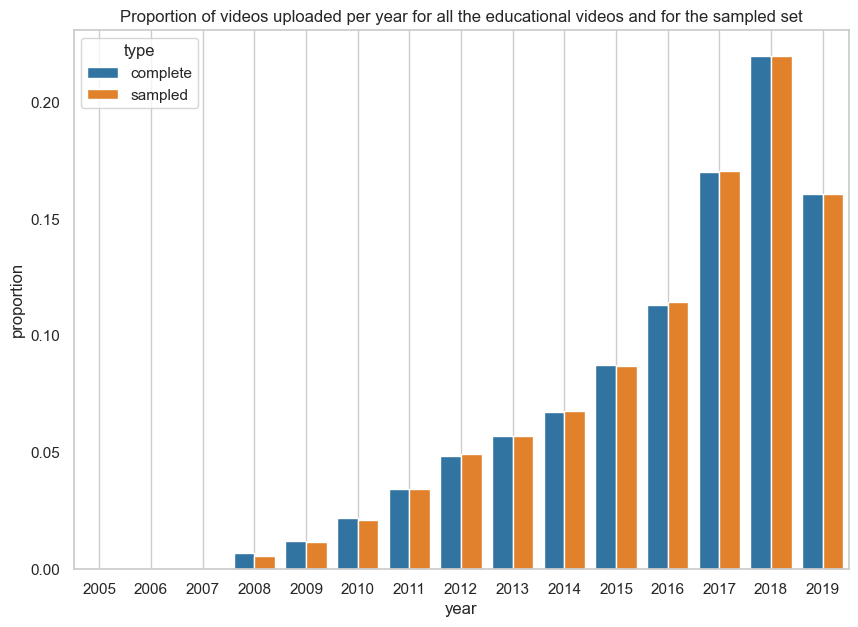

In [188]:
# Proportions
classified_proportions = (classified.groupby('year').size()/len(classified)).reset_index(name='proportion')
original_proportions = (df.groupby('year').size()/len(df)).reset_index(name='proportion')
original_proportions['type'] = 'complete'
classified_proportions['type'] = 'sampled'
proportions_df = pd.concat([original_proportions, classified_proportions])

# Chisquare goodness of fit
sampled = classified.groupby('year').size()
complete = df.groupby('year').size()
complete = complete * (sampled.sum() / complete.sum())
chi_stat, p_value = chisquare(f_obs=sampled, f_exp=complete)
print(chi_stat, p_value)

# Plot
fig, ax = plt.subplots(1,1, figsize=(10,7))
palette = sns.color_palette("tab10")
sns.barplot(data=proportions_df, x='year', y='proportion', hue='type', ax=ax, palette=palette)
ax.grid()
ax.set_title('Proportion of videos uploaded per year for all the educational videos and for the sampled set')
plt.savefig(f"./data/figures/hybs/comparison_proportion_video_uploaded_year.png")
plt.show()

# Plotly
# Merge the proportions into a single DataFrame
proportions_df = pd.DataFrame({
    'year': classified_proportions.index,
    'sample_dataset': classified_proportions['proportion'],
    'whole_dataset': original_proportions['proportion']
})

# Create the grouped bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=proportions_df['year'],
    y=proportions_df['sample_dataset'],
    name='Sample Dataset'
))
fig.add_trace(go.Bar(
    x=proportions_df['year'],
    y=proportions_df['whole_dataset'],
    name='Whole Dataset'
))

# Update layout for better visualization
fig.update_layout(
    title='Proportion of videos uploaded per year for all the educational videos and for the sampled set',
    xaxis_title='Year',
    yaxis_title='Proportion',
    barmode='group',  # Side-by-side bars
    legend_title='Dataset',
        xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    title_x = 0.5,
)
fig.write_html(f"./data/figures/hybs/comparison_proportion_video_uploaded_year.html")
# fig.show()

> Cannot reject null hypothesis that the two distribution have the same frequencies

14.488299611094055 0.20714103096036054


C:\Users\fpili\AppData\Local\Temp\ipykernel_19696\226191677.py:18: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



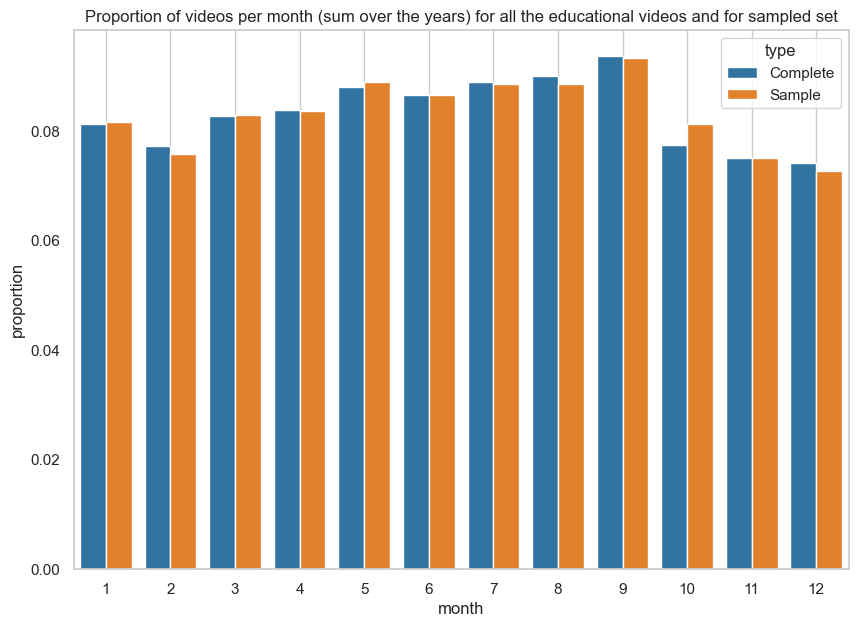

In [189]:
# Proportions
classified_proportion = (classified.groupby('month').size()/len(classified)).reset_index(name='proportion')
original_proportion = (df.groupby('month').size()/len(df)).reset_index(name='proportion')
classified_proportion['type'] = 'Sample'
original_proportion['type'] = 'Complete'
proportions_df = pd.concat([original_proportion, classified_proportion])

# Chisquare goodness of fit
sampled = classified.groupby('month').size()
complete = df.groupby('month').size()
complete = complete * (sampled.sum() / complete.sum())
chi_stat, p_value = chisquare(f_obs=sampled, f_exp=complete)
print(chi_stat, p_value)

# Plot
fig, ax = plt.subplots(1,1, figsize=(10,7))
palette = sns.color_palette("tab10")
sns.barplot(data=proportions_df, x='month', y='proportion', hue='type', ax=ax, palette=palette)
ax.set_title('Proportion of videos per month (sum over the years) for all the educational videos and for sampled set')
ax.grid()
plt.savefig(f"./data/figures/hybs/comparison_proportion_video_uploaded_month.png")

# Plotly
# Merge the proportions into a single DataFrame
proportions_df = pd.DataFrame({
    'month': classified_proportion.index + 1,
    'sample_dataset': classified_proportion['proportion'],
    'whole_dataset': original_proportion['proportion']
})

# Create the grouped bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=proportions_df['month'],
    y=proportions_df['sample_dataset'],
    name='Sample Dataset'
))
fig.add_trace(go.Bar(
    x=proportions_df['month'],
    y=proportions_df['whole_dataset'],
    name='Whole Dataset'
))

# Update layout for better visualization
fig.update_layout(
    title='Proportion of videos per month (sum over the years) for all the educational videos and for sampled set',
    xaxis_title='Month',
    yaxis_title='Proportion',
    barmode='group',  # Side-by-side bars
    legend_title='Dataset',
        xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    title_x = 0.5,
)
fig.write_html(f"./data/figures/hybs/comparison_proportion_video_uploaded_month.html")
# fig.show()

> Cannot reject null hypothesis that the two distribution have the same frequencies

# Categories across years


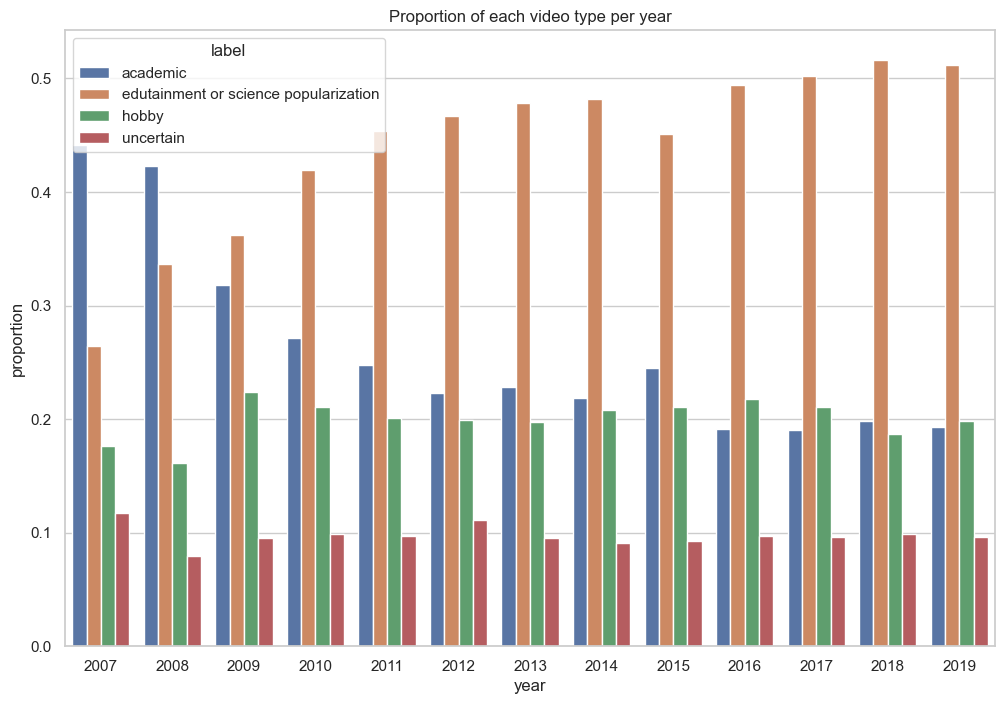

In [ ]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
# Remove 2005, 2006, as the number of videos is too low to make any statistical analysis
years = np.arange(2007, 2020)
classified = classified[classified['year'].isin(years)]

# Compute proportion per year for each label
count_per_year_label = classified.groupby(['year', 'label']).size().unstack(fill_value=0)
proportion_per_year = count_per_year_label.div(count_per_year_label.sum(axis=1), axis=0)

# Convert for easier plot
proportion_long = proportion_per_year.reset_index().melt(id_vars='year', value_name='proportion', var_name='label')

# Plot
sns.set_theme(style="whitegrid")
palette = sns.color_palette("deep", 4)  # 4 distinct colors from the Set2 palette
fig, ax = plt.subplots(1,1, figsize=(12,8))

sns.barplot(data=proportion_long, x='year', y='proportion', hue='label', ax=ax, palette=palette)
ax.set_title('Proportion of each video type per year')
plt.savefig("./data/figures/hybs/proportion_video_type_per_year.png")
plt.show()


# Plotly
fig_plotly = px.bar(
    proportion_long,
    x='year',
    y='proportion',
    color='label',
    title='Proportion of Each Video Type per Year',
    labels={'proportion': 'Proportion', 'year': 'Year', 'label': 'Video Type'},
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig_plotly.update_layout(
    barmode='group',  # Side-by-side bars
    xaxis=dict(
        tickmode='linear',
        dtick=1
    ),
    yaxis_title='Proportion',
    legend_title='Video Type',
    title_x=0.5,
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=1.02,  # Position above the plot
        xanchor="center",
        x=0.5
    )
)

# Show Plotly plot
fig_plotly.write_html(f"./data/figures/hybs/proportion_video_type_per_year.html")
# fig_plotly.show()


> We can observe a decline of the academic videos for the benefit of edutainment videos.

> There is a noticable increase of edutainment videos from 2008 to 2013, suggesting that edutainment became popular in the early years of youtube.
> The early rise in popularity could reflect the novelty of the platform and the unmet demand for accessible educational content.
> The slower growth in later years might suggest a maturation of the YouTube ecosystem, where edutainment became an established genre.

> We see that academic videos became less and less popular reaching a plateau at around 2011, reaching a plateau. We could argue that youtube introduced a new type of educational content that is easier to consume and fits YouTube’s informal and entertainment-focused culture better.

> The transition from academic to edutainment content reflects changing consumer preferences. Viewers on YouTube may prefer content that simplifies complex topics, incorporates storytelling, and uses visuals and humor to maintain engagement.

### OLS

In [196]:
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
# Remove 2005, 2006 as the number of videos is too low to make any statistical analysis
years = np.arange(2007, 2020)
classified = classified[classified['year'].isin(years)]

# Compute proportion per year for each label
count_per_year_label = classified.groupby(['year', 'label']).size().unstack(fill_value=0)
proportion_per_year = count_per_year_label.div(count_per_year_label.sum(axis=1), axis=0).reset_index()

X = proportion_per_year['year']
X = sm.add_constant(X)

# Academic
Y = proportion_per_year['academic']
model_academic = sm.OLS(Y, X).fit()
print('Academic')
print(model_academic.summary())

# Edutainment
Y = proportion_per_year['edutainment or science popularization']
model_edutainment = sm.OLS(Y, X).fit()
print('Edutainment')
print(model_edutainment.summary())

# Hobby
Y = proportion_per_year['hobby']
model_hobby = sm.OLS(Y, X).fit()
print('Hobby')
print(model_hobby.summary())

Academic
                            OLS Regression Results                            
Dep. Variable:               academic   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     30.20
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           0.000188
Time:                        14:14:07   Log-Likelihood:                 22.828
No. Observations:                  13   AIC:                            -41.66
Df Residuals:                      11   BIC:                            -40.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5186      6.780      5.534

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.



> Academic : R² = 0.733, pvalue = 0.000188, statistic relationship between year and proportion of academic videos

> Edutainment : R² = 0.792, pvalue = 4.63e-05, statistic relationship between year and proportion of edutainment videos

> hobby : R² = 0.100, pvalue = 0.292, no statistical relationship between year and proportion of hobby videos

# Education content over time

In [154]:
import pandas as pd
df_vd = pd.read_feather("./data/raw/yt_metadata_helper.feather")

In [155]:
df_vd['upload_date'] = pd.to_datetime(df_vd['upload_date'])
df_vd['year'] = df_vd['upload_date'].dt.year

## Education videos over time

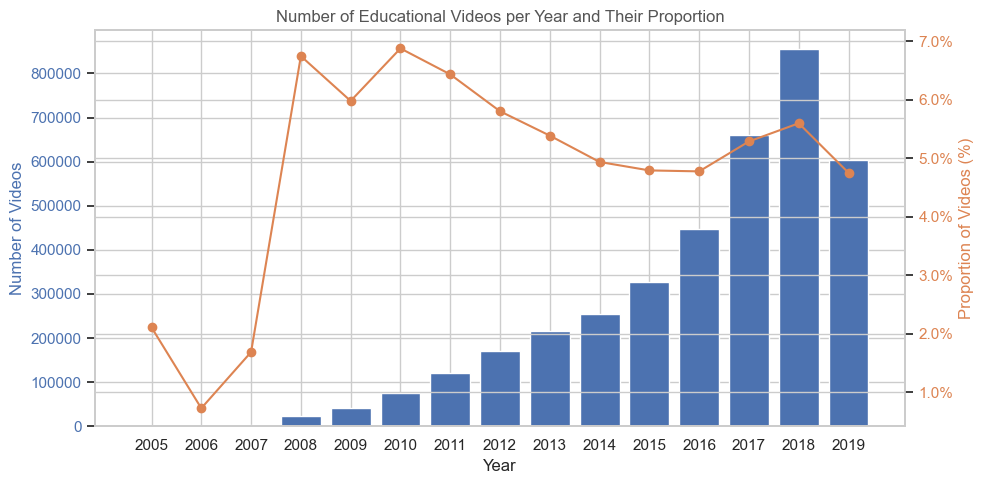

In [210]:
colors = sns.color_palette("deep")
bar_color = colors[0]    # for bars
line_color = colors[1]   # for line

number_per_year = df_vd[df_vd['categories'] == 'Education'].groupby('year').size()
total_videos_per_year = df_vd.groupby('year').size()
proportion_per_year = number_per_year.div(total_videos_per_year) * 100  # Convert to percentages

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar chart
ax.bar(number_per_year.index, number_per_year.values, color=bar_color, width=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Videos', color=bar_color)
ax.set_xticks(number_per_year.index)
ax.tick_params(axis='y', labelcolor=bar_color)

# Create a twin axis for the percentages
ax2 = ax.twinx()
ax2.plot(proportion_per_year.index, proportion_per_year.values, 
         color=line_color, marker='o', markerfacecolor=line_color, markeredgecolor=line_color)
ax2.set_ylabel('Proportion of Videos (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Format the second y-axis to show the '%' sign
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Number of Educational Videos per Year and Their Proportion', color='#555555')
plt.tight_layout()
plt.savefig('./data/figures/hybs/educational_videos_number_proportion_per_year.png')
plt.show()

# Create the Plotly figure
fig = go.Figure()
# Add the bar chart for the number of videos
fig.add_trace(go.Bar(
    x=number_per_year.index,
    y=number_per_year.values,
    name='Number of Videos',
    marker_color='rgb(31, 119, 180)',  # Deep blue color
    yaxis='y'  # Link to primary y-axis
))
# Add the line chart for the proportions
fig.add_trace(go.Scatter(
    x=proportion_per_year.index,
    y=proportion_per_year.values,
    name='Proportion of Videos',
    mode='lines+markers',
    line=dict(color='rgb(255, 127, 14)', width=2),  # Deep orange line
    marker=dict(size=8, color='rgb(255, 127, 14)'),
    yaxis='y2'  # Link to secondary y-axis
))
# Customize the layout
fig.update_layout(
    title='Number of Educational Videos per Year and Their Proportion',
    title_x=0.5,
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title=dict(
            text='Number of Videos',
            font=dict(color='rgb(31, 119, 180)')
        ),
        tickfont=dict(color='rgb(31, 119, 180)')
    ),
    yaxis2=dict(
        title=dict(
            text='Proportion of Videos (%)',  # Add percentage symbol in the title
            font=dict(color='rgb(255, 127, 14)')
        ),
        tickfont=dict(color='rgb(255, 127, 14)'),
        overlaying='y',  # Overlay second y-axis
        side='right',  # Place second axis on the right side
        tickformat='.2f',  # Keep the fraction as-is, e.g., 0.25 instead of 25%
    ),
    legend=dict(
        title='Metric',
        x=0.5,
        xanchor='center',
        orientation='h'
    ),
    template='plotly_white'
)
# Show the plot
fig.write_html('./data/figures/hybs/educational_videos_number_proportion_per_year.html')
# fig.show()

### OLS (starting from 2008)

In [211]:
# Only look after 2008 as it is the point from which the proportion decreases
years_to_use = np.arange(2008, 2020)
df_vd_filtered = df_vd[df_vd['year'].isin(years_to_use)]

number_per_year = df_vd_filtered[df_vd_filtered['categories'] == 'Education'].groupby('year').size()
total_videos_per_year = df_vd_filtered.groupby('year').size()
proportion_per_year = number_per_year.div(total_videos_per_year) * 100  # Convert to percentages

X = years_to_use
X = sm.add_constant(X)
Y = proportion_per_year

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     17.10
Date:                Fri, 20 Dec 2024   Prob (F-statistic):            0.00203
Time:                        14:19:01   Log-Likelihood:                -7.3302
No. Observations:                  12   AIC:                             18.66
Df Residuals:                      10   BIC:                             19.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.5489     82.210      4.203      0.0

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.



> R² = 0.631, pvalue = 0.00203, 63.1 % of variation explained by the model, relatively good fit, statistically significant model, the year has a significant effect on the proportion of academic videos. Slope = -0.1688 meaning that according to this linear model, each years shows 0.1688 % less academic videos than the preceding year

## Education channels over time

In [213]:
df_ch = pd.read_csv("./data/raw/df_channels_en.tsv.gz", compression="infer", sep="\t")
df_ch = df_ch.dropna()
df_ch["join_date"] = pd.to_datetime(df_ch["join_date"])
df_ch['year'] = df_ch['join_date'].dt.year.astype(int)

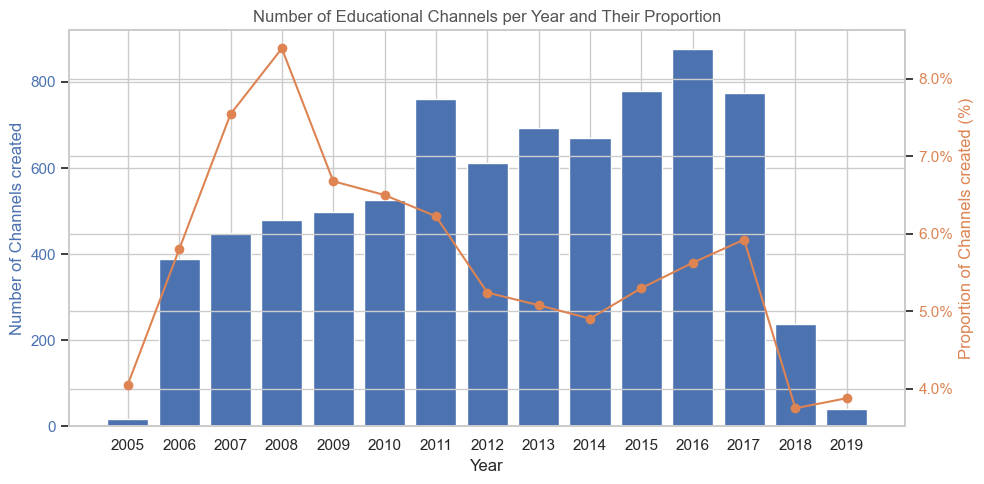

In [214]:
number_education_per_year = df_ch[df_ch['category_cc'] == 'Education'].groupby('year').size()
total_channel_per_year = df_ch.groupby('year').size()
proportion_per_year = number_education_per_year.div(total_channel_per_year) * 100

colors = sns.color_palette("deep")
bar_color = colors[0]    # for bars
line_color = colors[1]   # for line

fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bar chart
ax.bar(number_education_per_year.index, number_education_per_year.values, color=bar_color, width=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Channels created', color=bar_color)
ax.set_xticks(number_education_per_year.index)
ax.tick_params(axis='y', labelcolor=bar_color)

# Create a twin axis for the percentages
ax2 = ax.twinx()
ax2.plot(proportion_per_year.index, proportion_per_year.values, 
         color=line_color, marker='o', markerfacecolor=line_color, markeredgecolor=line_color)
ax2.set_ylabel('Proportion of Channels created (%)', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Format the second y-axis to show the '%' sign
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Number of Educational Channels per Year and Their Proportion', color='#555555')
plt.tight_layout()
plt.savefig("./data/figures/hybs/educational_channel_number_proportion_per_year.png")
plt.show()

# Create the Plotly figure
fig = go.Figure()
# Add the bar chart for the number of videos
fig.add_trace(go.Bar(
    x=number_education_per_year.index,
    y=number_education_per_year.values,
    name='Number of Videos',
    marker_color='rgb(31, 119, 180)',  # Deep blue color
    yaxis='y'  # Link to primary y-axis
))
# Add the line chart for the proportions
fig.add_trace(go.Scatter(
    x=proportion_per_year.index,
    y=proportion_per_year.values,
    name='Proportion of Videos',
    mode='lines+markers',
    line=dict(color='rgb(255, 127, 14)', width=2),  # Deep orange line
    marker=dict(size=8, color='rgb(255, 127, 14)'),
    yaxis='y2'  # Link to secondary y-axis
))
# Customize the layout
fig.update_layout(
    title='Number of Educational Videos per Year and Their Proportion',
    title_x=0.5,
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title=dict(
            text='Number of Videos',
            font=dict(color='rgb(31, 119, 180)')
        ),
        tickfont=dict(color='rgb(31, 119, 180)')
    ),
    yaxis2=dict(
        title=dict(
            text='Proportion of Videos (%)',  # Add percentage symbol in the title
            font=dict(color='rgb(255, 127, 14)')
        ),
        tickfont=dict(color='rgb(255, 127, 14)'),
        overlaying='y',  # Overlay second y-axis
        side='right',  # Place second axis on the right side
        tickformat='.2f',  # Keep the fraction as-is, e.g., 0.25 instead of 25%
    ),
    legend=dict(
        title='Metric',
        x=0.5,
        xanchor='center',
        orientation='h'
    ),
    template='plotly_white'
)
# Show the plot
fig.write_html("./data/figures/hybs/educational_channel_number_proportion_per_year.html")
# fig.show()

### OLS on proportion of channels created per year and number of channels created per year

In [215]:
# Remove 2005, 2006, 2007, and 2019 only for the absolute number, not for proportion
df_ch = pd.read_csv("./data/raw/df_channels_en.tsv.gz", compression="infer", sep="\t")
df_ch = df_ch.dropna()
df_ch["join_date"] = pd.to_datetime(df_ch["join_date"])
df_ch['year'] = df_ch['join_date'].dt.year.astype(int)

years_to_use_proportion = np.arange(2008, 2020)
years_to_use_count = np.arange(2008, 2019)

number_education_per_year = df_ch[df_ch['category_cc'] == 'Education'].groupby('year').size()
total_channel_per_year = df_ch.groupby('year').size()
proportion_per_year = number_education_per_year.div(total_channel_per_year) * 100

number_education_per_year = number_education_per_year.reset_index(name='count')
proportion_per_year = proportion_per_year.reset_index(name='proportion')

proportion_per_year = proportion_per_year[proportion_per_year['year'].isin(years_to_use_proportion)]
number_education_per_year = number_education_per_year[number_education_per_year['year'].isin(years_to_use_count)]

# OSL count
X = number_education_per_year['year']
X = sm.add_constant(X)
Y = number_education_per_year['count']
model_count = sm.OLS(Y, X).fit()
print('Number education channels created per year')
print(model_count.summary())

# OSL proportion
X = proportion_per_year['year']
X = sm.add_constant(X)
Y = proportion_per_year['proportion']
model_count = sm.OLS(Y, X).fit()
print('\nProportion education channels created per year')
print(model_count.summary())

Number education channels created per year
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                    0.2775
Date:                Fri, 20 Dec 2024   Prob (F-statistic):              0.611
Time:                        14:20:06   Log-Likelihood:                -72.161
No. Observations:                  11   AIC:                             148.3
Df Residuals:                       9   BIC:                             149.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.

c:\Users\fpili\anaconda3\envs\ada2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.



> Number of channels created per year : R² = 0.03, the model is not statistically significant, but this is due to the year 2018 that has a very low amount of educational channels created.

> Proportion of educational channels created per year : R² = 0.684, pvalue = 0.000903. The model is statistically significant, with a slope of -0.29 meaning that each year has 0.29% less educational channels created than the previous year